In [731]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
import pylab as pl

In [776]:
weather_dataset = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2015_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)

# Using All Weather Variables

In [777]:
# Remove unused columns and reorder 
weather_dataset = weather_dataset[['precipMM', 'tempC', 'windspeedKmph', 'cond', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatIndexC', 'dewPointC', 'windChillC', 'windGustKmph', 'feelsLikeC']]

In [778]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.loc[:, weather_dataset.columns != 'precipMM'].values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = weather_dataset['precipMM']

## Ridge Regression using train_test_split

In [735]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=-0.2)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)
# Train the model using the training set
ridge.fit(X_train,Y_train)

# Train the model using the training sets
ridge.fit(X_train,Y_train)

Ridge(alpha=-0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [736]:
p = ridge.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train = r2_score(Y_test, p)
rmse_train = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train)
print("RMSE", rmse_train)

R2 score 0.867734360254
RMSE 0.0240679775671


In [737]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', ridge.coef_)

Regression Coefficients: 
 [ 0.03607703  0.10862769 -0.00117744 -0.02150626 -0.52100957 -0.00988745
  0.01187814  0.01502162 -0.04249806  0.03641674  0.02825691  0.01624313
 -0.        ]


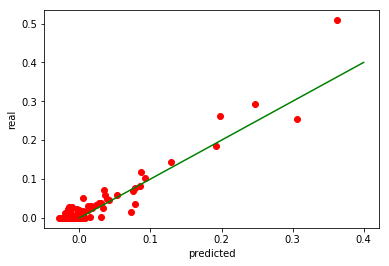

In [738]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

# pl.savefig('wwo_model_results/ridge_all_scatterplot.png')

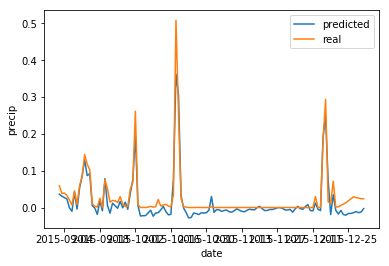

In [740]:
# Plot outputs
%matplotlib inline
pl.plot(Y_test.index, p, label='predicted')
pl.plot(Y_test.index, Y_test, label='real')
pl.ylabel('precip')
pl.xlabel('date')
pl.legend()
pl.show()

# pl.savefig('wwo_model_results/ridge_all_linegraph.png')

## Ridge Regression using 10-fold cross validation

In [741]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ridge.fit(x_train, y_train)
    p = ridge.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [742]:
method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train)
print('RMSE on training: %.6f'  %rmse_train)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv)

Method: Ridge Regression
R2 score on training: 0.867734
RMSE on training: 0.024068
RMSE on 10-fold CV: 0.021562


## Play with alpha

Ridge Regression
alpha	 R2SCORE_train	 RMSE_train	 RMSE_10cv

     alpha  r2score_train
0  -0.9900      -1.881527
1  -0.9405      -2.520533
2  -0.8910      -4.342319
6  -0.6930      -8.161811
8  -0.5940      -2.305928
9  -0.5445       0.137116
10 -0.4950       0.584847
11 -0.4455       0.740515
12 -0.3960       0.809001
13 -0.3465       0.842220
14 -0.2970       0.858551
15 -0.2475       0.865831
16 -0.1980       0.867732
17 -0.1485       0.865732
18 -0.0990       0.858068
19 -0.0495       0.617481


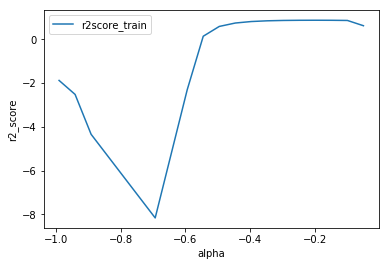

In [779]:
print('Ridge Regression')
print('alpha\t R2SCORE_train\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(-0.99,-0.0,20,endpoint=False)

t_alpha = []

for a in alpha:
    
    # Create linear regression object with a ridge coefficient 0.5
    ridge = Ridge(fit_intercept=True, alpha=a)

    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

    # Train the model using the training sets
    ridge.fit(X_train,Y_train)
    
    p = ridge.predict(X_test)

    # Compute RMSE and r2_score on training data
    r2score_train = r2_score(Y_test, p)
    rmse_train = np.sqrt(mean_squared_error(Y_test, p))
    
    # Now let's compute RMSE using 10-fold x-validation
    kf = KFold(n_splits=10, shuffle=False, random_state=None)
    xval_err = 0
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        ridge.fit(x_train, y_train)
        p = ridge.predict(x_test)
        e = p-y_test
        xval_err += np.dot(e,e)

    rmse_10cv = np.sqrt(xval_err/len(x))
    
#     print('{:.3f}\t {:.6f}\t\t {:.6f}\t\t {:.6f}'.format(a,r2score_train,rmse_train,rmse_10cv))
    
    row = [a, r2score_train]
    t_alpha.append(row)

cols = ['alpha', 'r2score_train']
t_alpha = pd.DataFrame(t_alpha, columns=cols)

t_alpha = t_alpha[t_alpha.r2score_train > -10]
print(t_alpha[t_alpha.r2score_train > -10])

# Plot outputs
%matplotlib inline
pl.plot(t_alpha.alpha, t_alpha.r2score_train)
pl.ylabel('r2_score')
pl.xlabel('alpha')
pl.legend()
pl.show()

pl.savefig('wwo_model_results/ridge_all.png')

# Using Correlated Weather Variables

In [773]:
# Remove unused columns and reorder 
weather_dataset = weather_dataset[['precipMM', 'dewPointC']]

In [774]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.loc[:, weather_dataset.columns != 'precipMM'].values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = weather_dataset['precipMM']

## Ridge Regression using train_test_split

In [758]:
# Create ridge regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=-0.7)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

# Train the model using the training set
ridge.fit(X_train,Y_train)

Ridge(alpha=-0.7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [759]:
p = ridge.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train_corr = r2_score(Y_test, p)
rmse_train_corr = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train_corr)
print("RMSE", rmse_train_corr)

R2 score 0.0696632315746
RMSE 0.0638316649168


In [760]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', ridge.coef_)

Regression Coefficients: 
 [ 0.15987659 -0.        ]


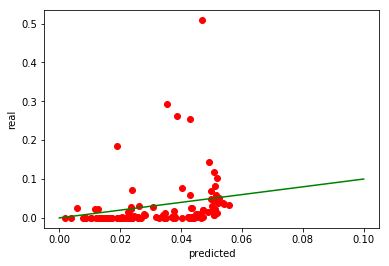

In [761]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.1],[0,0.1], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

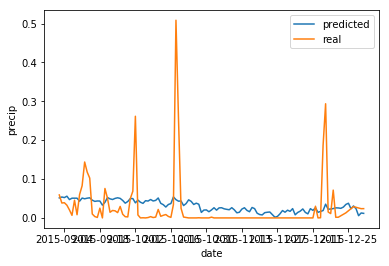

In [762]:
# Plot outputs
%matplotlib inline
pl.plot(Y_test.index, p, label='predicted')
pl.plot(Y_test.index, Y_test, label='real')
pl.ylabel('precip')
pl.xlabel('date')
pl.legend()
pl.show()

## Ridge Regression using 10-fold cross validation

In [763]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ridge.fit(x_train, y_train)
    p = ridge.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv_corr = np.sqrt(xval_err/len(x))

In [764]:
method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train_corr)
print('RMSE on training: %.6f'  %rmse_train_corr)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv_corr)

Method: Ridge Regression
R2 score on training: 0.069663
RMSE on training: 0.063832
RMSE on 10-fold CV: 0.052489


## Play with alpha

Ridge Regression
alpha	 R2SCORE_train	 RMSE_train	 RMSE_10cv

-0.990	 0.069377		 0.063841		 0.052747
-0.941	 0.069478		 0.063838		 0.052697
-0.891	 0.069555		 0.063835		 0.052649
-0.841	 0.069611		 0.063833		 0.052604
-0.792	 0.069647		 0.063832		 0.052562
-0.742	 0.069663		 0.063832		 0.052522
-0.693	 0.069662		 0.063832		 0.052484
-0.643	 0.069644		 0.063832		 0.052449
-0.594	 0.069610		 0.063834		 0.052416
-0.544	 0.069561		 0.063835		 0.052385
-0.495	 0.069498		 0.063837		 0.052355
-0.446	 0.069422		 0.063840		 0.052328
-0.396	 0.069334		 0.063843		 0.052302
-0.346	 0.069234		 0.063846		 0.052278
-0.297	 0.069124		 0.063850		 0.052256
-0.247	 0.069003		 0.063854		 0.052235
-0.198	 0.068873		 0.063859		 0.052215
-0.148	 0.068734		 0.063864		 0.052197
-0.099	 0.068586		 0.063869		 0.052180
-0.049	 0.068431		 0.063874		 0.052164
     alpha  r2score_train
0  -0.9900       0.069377
1  -0.9405       0.069478
2  -0.8910       0.069555
3  -0.8415       0.069611
4  -0.7920       0.069647
5 

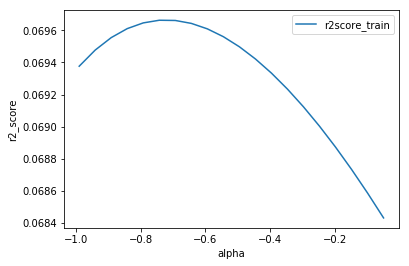

In [775]:
print('Ridge Regression')
print('alpha\t R2SCORE_train\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(-0.99,-0.0,20,endpoint=False)

t_alpha = []

for a in alpha:
    
    # Create linear regression object with a ridge coefficient 0.5
    ridge = Ridge(fit_intercept=True, alpha=a)

    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

    # Train the model using the training sets
    ridge.fit(X_train,Y_train)
    
    p = ridge.predict(X_test)

    # Compute RMSE and r2_score on training data
    r2score_train = r2_score(Y_test, p)
    rmse_train = np.sqrt(mean_squared_error(Y_test, p))
    
    # Now let's compute RMSE using 10-fold x-validation
    kf = KFold(n_splits=10, shuffle=False, random_state=None)
    xval_err = 0
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        ridge.fit(x_train, y_train)
        p = ridge.predict(x_test)
        e = p-y_test
        xval_err += np.dot(e,e)

    rmse_10cv = np.sqrt(xval_err/len(x))
    
    print('{:.3f}\t {:.6f}\t\t {:.6f}\t\t {:.6f}'.format(a,r2score_train,rmse_train,rmse_10cv))
    
    row = [a, r2score_train]
    t_alpha.append(row)

cols = ['alpha', 'r2score_train']
t_alpha = pd.DataFrame(t_alpha, columns=cols)

t_alpha = t_alpha[t_alpha.r2score_train > -10]
print(t_alpha[t_alpha.r2score_train > -10])

# Plot outputs
%matplotlib inline
pl.plot(t_alpha.alpha, t_alpha.r2score_train)
pl.ylabel('r2_score')
pl.xlabel('alpha')
pl.legend()
pl.show()

pl.savefig('wwo_model_results/ridge_corr_dwpt.png')